# Calculate the difference between two images

In EO, the difference between two images typically refers to computing the difference between two images of the same scene, captured at different times or under different conditions.

What “Difference Between Two Images” Means:

*Temporal Difference*:
- The most common usage is to compare images taken at different times of the same location. For example, in remote sensing, you might have satellite images of the same area captured on different dates. The “difference” here is a pixel-by-pixel subtraction between the images, which highlights changes that occurred over time. For example:
- For example: If the first image is captured on April 23, 2020, and the second on July 2, 2020, subtracting one from the other shows how the scene has changed between those two dates (e.g., changes in vegetation, water levels, urban development, etc.).

*Spectral Difference*:
- Sometimes, the difference might involve different spectral bands of the same image. For example, subtracting the Red band from the Near-Infrared (NIR) band in multispectral imagery to calculate a vegetation index like NDVI (Normalized Difference Vegetation Index).

*Why is temporal difference useful*?

This technique is very useful in remote sensing for identifying changes over time, such as deforestation, urban expansion, crop health, or flood damage. The difference image highlights areas where significant changes have occurred, while areas with little or no change will have pixel values close to zero.

In this notebooke we will focus on calculating temporal difference and visualizing it.


In [28]:
import openeo
from config import user,passwd,eo_service_url
import io
import rasterio.plot
from demo_helpers import show_result
import numpy as np
from demo_regions import s2
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [29]:
connection = openeo.connect(eo_service_url)
 
connection.authenticate_basic(username=user, password=passwd)

<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

In [30]:
res=connection.load_collection(collection_id=s2.s2_msi_l2a,
                         spatial_extent=s2.bbox.karlstad_mini_land,
                         temporal_extent=s2.timespans.two_images,
                         bands=['b04', 'b03', 'b02'],
                        )

In [31]:
# `res` contains the loaded collection with two temporal extents
# Split the collection by temporal extents

first_image = res.reduce_dimension(dimension='t', reducer='first')
last_image = res.reduce_dimension(dimension='t', reducer='last')

[<open DatasetReader name='/vsipythonfilelike/8800898a-d972-4aef-ad38-d5d5962a9567/8800898a-d972-4aef-ad38-d5d5962a9567' mode='r'>]

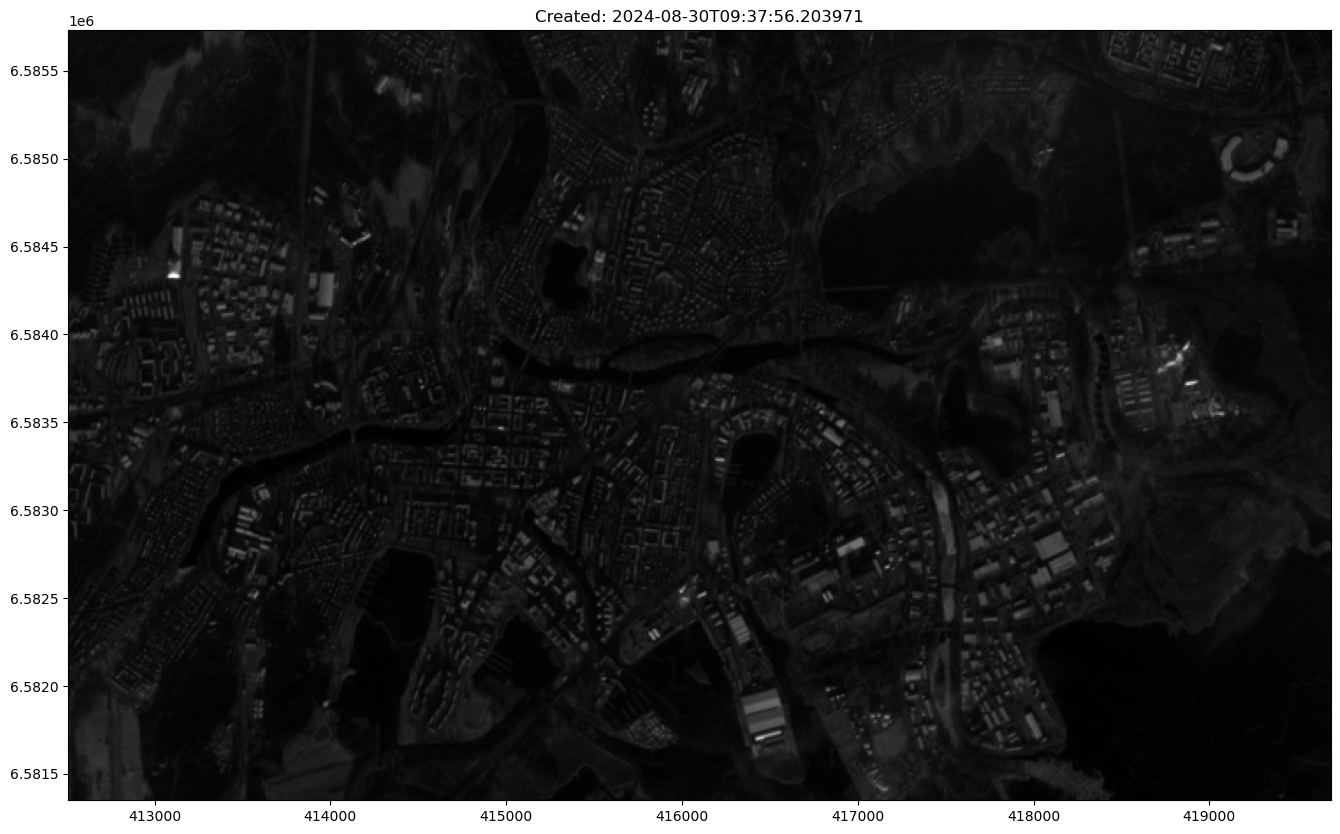

In [32]:
# First temporal image
show_result(first_image.download(format="gtiff"))

[<open DatasetReader name='/vsipythonfilelike/4ad35667-e474-424b-98cc-2ed0391f2e62/4ad35667-e474-424b-98cc-2ed0391f2e62' mode='r'>]

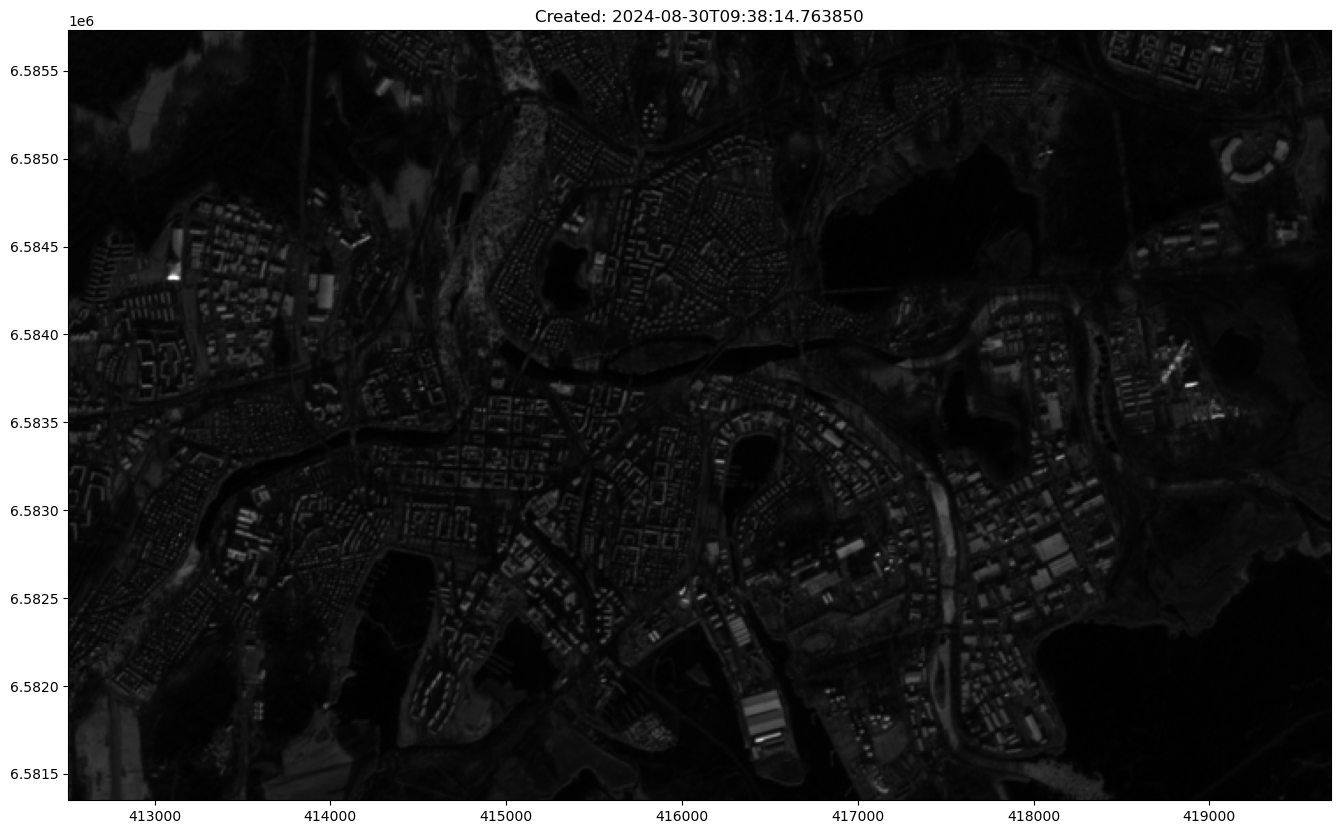

In [33]:
# Second temporal image
show_result(last_image.download(format="gtiff"))

In [34]:
# Select a specific band for calculations (e.g., Red band, which is b04)
b04 = res.band("b04")

b04_first_temporal = b11.reduce_dimension(dimension="t", reducer="first")
b04_last_temporal = b11.reduce_dimension(dimension="t", reducer="last")

# Calculate the temporal difference between the two images over the red band
difference_red_band = b04_last_temporal - b04_first_temporal
difference_red_band

In [35]:
# Download the result for visualization
result = difference_red_band.download()

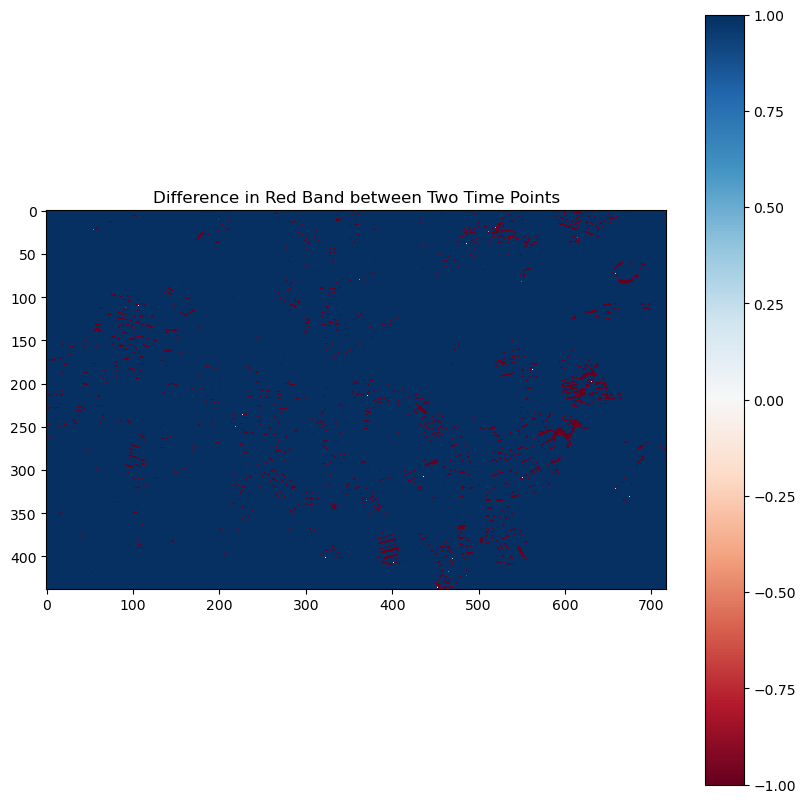

In [36]:
# Visualize the difference
import rasterio
import matplotlib.pyplot as plt

# Load the difference image into rasterio
filelike = io.BytesIO(result)
raster_data = rasterio.open(filelike)

# Read the data from the raster
image_data = raster_data.read(1)  # Read the first band (since it's single-band)

# Plot the difference image using imshow
fig, ax = plt.subplots(figsize=(10, 10))

# 'RdBu' is a specific colormap that ranges from red to blue, 
# often used to show diverging data,
# Here, one end of the spectrum (e.g., red) represents positive values
# and the other end (e.g., blue) represents negative values.
# This makes it particularly useful for visualizing differences or changes
# where you want to highlight both increases and decreases.
# vmin=-1:  means that any data value at or below -1 will be mapped to the darkest blue in the colormap.
# vmax=1: means that any data value at or above 1 will be mapped to the darkest red in the colormap.
cax = ax.imshow(image_data, cmap='RdBu', vmin=-1, vmax=1)  # Adjust vmin and vmax to your data range

plt.title('Difference in Red Band between Two Time Points')

# Add the colorbar representing the values
plt.colorbar(cax, ax=ax)

# Show the plot
plt.show()